# Forecasting Tesla's future stock prices using LSTM

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
import os
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

Download data from Yahoo Finance

In [2]:
ticker = 'TSLA'
start_date = '2015-01-01'
end_date = '2025-01-31'
df = yf.download(ticker, start=start_date, end=end_date)
tsla_close = df['Close'].values.reshape(-1, 1)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [8]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


Normalize and Prepare the data and then Build the model

In [4]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
tsla_close_scaled = scaler.fit_transform(tsla_close)

# Prepare data for LSTM
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X, Y = create_dataset(tsla_close_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, Y, epochs=50, batch_size=32)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0280
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 8.4635e-04
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 8.2195e-04
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 7.2765e-04
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 6.2749e-04
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 6.8127e-04
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 6.1943e-04
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 5.7362e-04
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 5.9622e-04
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4.6869e-04
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.1293e-04
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 4.9208e-04
Epoch 13/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 4.0810e-04
Epoch 14/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 4.6051e-04
Epoch 15/50
78/78 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

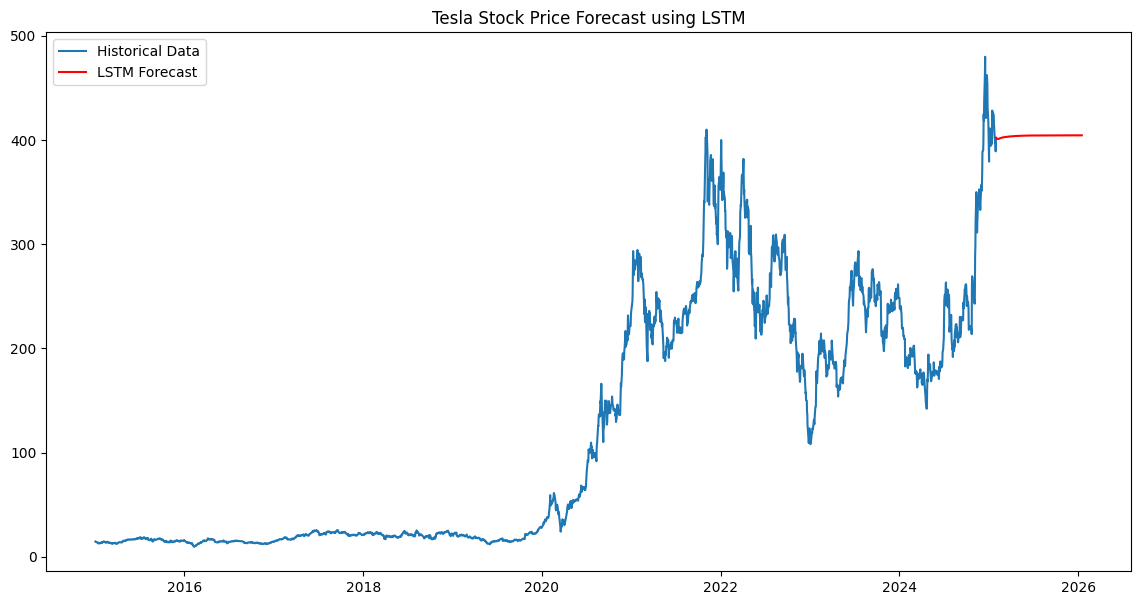

In [14]:
# Forecast for 12 months
forecast_steps = 252
input_data = tsla_close_scaled[-time_step:]
input_data = input_data.reshape(1, time_step, 1)

forecast = []

for _ in range(forecast_steps):
    prediction = model.predict(input_data)
    forecast.append(prediction[0, 0])
    input_data = np.append(input_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Plot forecast
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Historical Data')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='B'), forecast, label='LSTM Forecast', color='red')
plt.title('Tesla Stock Price Forecast using LSTM')
plt.legend()
plt.show()

In [16]:
# Create a DataFrame with Date and Predicted Price
last_date = df.index[-1]  # Use the last date from the original DataFrame `df`
forecast_dates = pd.date_range(start=last_date, periods=len(forecast) + 1, freq='B')[1:]  # 'B' for business days

# Create DataFrame
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Close': forecast.flatten()})

# Save to CSV
forecast_df.to_csv('tsla_forecast.csv', index=False)
print("Forecasted Tesla prices saved successfully!")

Forecasted Tesla prices saved successfully!
